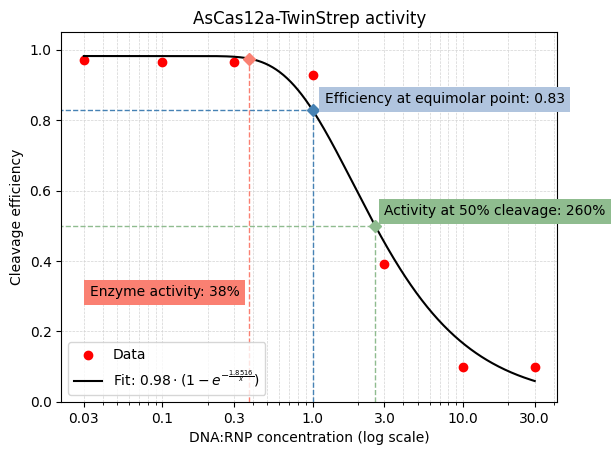

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize


def model_func(x, a, k):
    """Define the shape of the curve to fit.
    Args:
        x (array-like): Input data (RNP concentration).
        a (float): Maximum cleavage efficiency.
        k (float): Rate constant for the exponential decay.
    Returns:
        array-like: Cleavage efficiency based on the model.
    """
    return a * (1 - np.exp(-k / x))


# x: DNA to RNP concentration ratio
# 1 means that DNA concentration is equal to the RNP concentration
# At ratios below 1, the RNP is in excess and the cleavage efficiency is expected to plateau
# At ratios above 1, there is not enough RNP to cleave all the DNA, so the cleavage efficiency is expected to decrease
x_data = np.array([.03, .1, .3, 1, 3, 10, 30])

# y: Cleavage efficiency as determined from a gel: volume of cleaved DNA / total volume (cleaved + uncleaved)
y_data = np.array([.9696, .9641, .9643, .9271, .3909, .0982, .0975])

# Sort data in ascending order as required for curve fitting
sorted_indices = np.argsort(x_data)
x = x_data
y = y_data[sorted_indices]

# Fit the curve
(a, k), pcov = scipy.optimize.curve_fit(model_func, x, y)

# Generate fitted curve using logspace for smooth log-x plotting
x_fit = np.logspace(np.log10(min(x_data)), np.log10(max(x_data)), 500)
y_fit = model_func(x_fit, a, k)

# Plot data and fitted curve
plt.scatter(x, y, label='Data', color='red', zorder=2)
plt.plot(x_fit, y_fit, label=fr'Fit: ${a:.2f} \cdot (1 - e^{{-\frac{{{k:.4f}}}{{x}}}})$', color='black')

# Plot efficiency when RNP concentration is equal to DNA concentration
x_eff = 1
y_eff = model_func(x_eff, a, k)
plt.vlines(x_eff, 0, y_eff, linestyles='dashed', color='steelblue', lw=1)
plt.hlines(y_eff, 0, x_eff, linestyles='dashed', color='steelblue', lw=1)
plt.plot(x_eff, y_eff, 'D', color='steelblue')
plt.text(x_eff + .2, y_eff + .02,
         f'Efficiency at equimolar point: {y_eff:.2f}',
         bbox=dict(facecolor='lightsteelblue', edgecolor='none'),
         fontsize=10, ha='left')

# Enzyme activity is the lowest amount of RNP that completely cleaves target DNA
# Analytically, this is the maximal curvature point, after which the efficiency starts dropping noticeably
x_act = .203 * k  # Crude approximation of the elbow point
y_act = model_func(x_act, a, k)
plt.vlines(x_act, 0, y_act, linestyles='dashed', color='salmon', lw=1)
plt.plot(x_act, y_act, 'D', color='salmon')
plt.text(x_act - .05, .3, f'Enzyme activity: {x_act * 100:.0f}%',
         bbox=dict(facecolor='salmon', edgecolor='none'),
         fontsize=10, ha='right')

# Plot activity at 50% cleavage efficiency
y_50 = .5  # 50% cleavage efficiency
x_50 = -k / np.log(1 - y_50/a)  # inverse of the model function
plt.vlines(x_50, 0, y_50, linestyles='dashed', color='darkseagreen', lw=1)
plt.hlines(y_50, 0, x_50, linestyles='dashed', color='darkseagreen', lw=1)
plt.plot(x_50, y_50, 'D', color='darkseagreen')
plt.text(x_50 + .4, y_50 + .03,
         f'Activity at 50% cleavage: {x_50 * 100:.0f}%',
         bbox=dict(facecolor='darkseagreen', edgecolor='none'),
         fontsize=10, ha='left')

plt.xscale('log')
plt.xticks(x, [str(val) for val in x])
plt.ylim(0, 1.05)
plt.xlabel('DNA:RNP concentration (log scale)')
plt.ylabel('Cleavage efficiency')
plt.title('AsCas12a-TwinStrep activity')
plt.legend(loc='lower left')
plt.grid(True, which='both', ls='--', color='lightgray', linewidth=.5, zorder=1)